In [6]:
#String symmetry check
def symmetry(string):
    '''
    Given an input string (of 0s and 1s, 3n in length), checks if first half of string
    is equivalent to second half of string
    '''
    n = int(len(string)/3)
    
    for i in range(n):
        f = string[i]
        s = string[n+i]
        t = string[(2*n)+ i]
        
        if ((f!=s) or (f!=t)):
            return False
    return True

In [7]:
symmetry('101010')

True

In [8]:
from qiskit import *


In [9]:
def prepare_circuit_normal(circ):
    '''
    Given a circuit, adds measurement gates
    '''
    q = circ.num_qubits
    c = ClassicalRegister(q)
    circ.add_register(c)
    for i in range(q):
        circ.measure(i, i)
    return circ

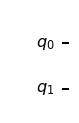

In [10]:
circ = QuantumCircuit(2)
circ.draw(output = 'mpl')

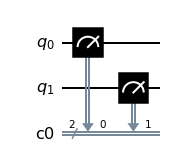

In [11]:
circ = prepare_circuit_normal(circ)
circ.draw(output = 'mpl')

In [12]:
circ.qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c0[2];\nmeasure q[0] -> c0[0];\nmeasure q[1] -> c0[1];\n'

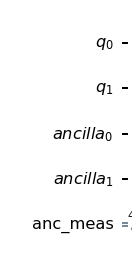

In [13]:
circ = QuantumCircuit(2)
q = circ.num_qubits
anc = QuantumRegister(q, 'ancilla')
anc_meas = ClassicalRegister(2*q, 'anc_meas')
circ.add_register(anc)
circ.add_register(anc_meas)
circ.draw(output = 'mpl')

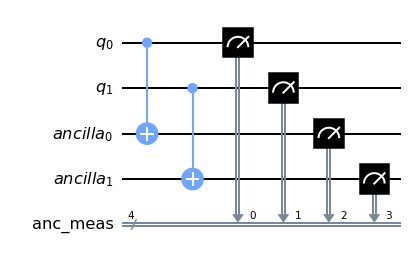

In [14]:
for i in range(q):
    circ.cx(i, q+i)
    
#adding measurement gates
for i in range(2*q):
    circ.measure(i, i)
circ.draw(output = 'mpl')


In [15]:
def prepare_circuit(circ):
    '''
    Given a circuit, prepare for readout error mitigation by addition of ancilla qubits and measurement gates
    '''
    #adding qubits and c bits
    q = circ.num_qubits
    anc = QuantumRegister(2*q, 'ancilla')
    anc_meas = ClassicalRegister(3*q, 'anc_meas')
    circ.add_register(anc)
    circ.add_register(anc_meas)
    
    #Cnot gates
    for i in range(q):
        circ.cx(i, q+i)
        circ.cx(i, (2*q)+i)
    
    #adding measurement gates
    for i in range(3*q):
        circ.measure(i, i)
    return circ

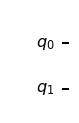

In [16]:
circ = QuantumCircuit(2)
circ.draw(output = 'mpl')

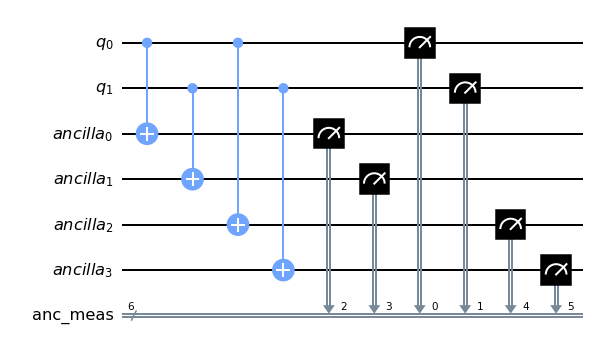

In [17]:
circ_n = prepare_circuit(circ)
circ_n.draw(output = 'mpl')

In [18]:
def modify_counts(counts, shots):
    '''
    Getting rid of non-symmetric counts (1st half doesnt match 2nd half i.e. '0100') and then cutting keys by half
    '''
    keys = counts.keys()
    print(keys)
    n_counts = {}
    for key in keys:
        print(key)
        print(symmetry(key))
        if (symmetry(key)):
            print('hi')
            k = int(len(key)/3)
            n_counts[key[:k]] = counts[key]
    
    #resizing shots for each count
    
    ##calcuating total shots
    mod_shots = 0
    n_keys = n_counts.keys()
    for key in n_keys:
        mod_shots+= n_counts[key]
    
    ##resizing now
    for key in n_keys:
        old_shots= n_counts[key]
        n_counts[key] = int((old_shots/mod_shots)*shots)
        
    return n_counts
        

In [19]:
counts = {'000001':100 , '111001':200, '101010':300, '010101':400}
modify_counts(counts, 1000)

dict_keys(['000001', '111001', '101010', '010101'])
000001
False
111001
False
101010
True
hi
010101
True
hi


{'10': 428, '01': 571}

In [20]:
def invert_bit_string(key):
    '''
    Inverting a bit string
    '''
    new_string = ''
    for i in key:
        if (i == '0'):
            new_string+= '1'
        else:
            new_string+= '0'
    return new_string

In [21]:
invert_bit_string('110')

'001'

In [27]:
def symmetry(string):
    '''
    Given an input string (of 0s and 1s, even length), checks if first half of string
    is equivalent to second half of string
    '''
    n = int(len(string)/2)
    
    for i in range(n):
        f = string[i]
        s = string[n+i]
        
        if (f!=s):
            return False
    return True

In [28]:
def modify_counts(counts, shots, invert = True):
    '''
    Getting rid of non-symmetric counts (1st half doesnt match 2nd half i.e. '0100') and then cutting keys by half
    '''
    keys = counts.keys()
    n_counts = {}
    for key in keys:
        if (symmetry(key)):
            k = int(len(key)/2)
            if(invert):
                print(key[:k])
                print(invert_bit_string(key[:k]))
                n_counts[invert_bit_string(key[:k])] = counts[key]
            else:
                n_counts[key[:k]] = counts[key]
    
    #resizing shots for each count
    
    ##calcuating total shots
    mod_shots = 0
    n_keys = n_counts.keys()
    for key in n_keys:
        mod_shots+= n_counts[key]
    
    ##resizing now
    for key in n_keys:
        old_shots= n_counts[key]
        n_counts[key] = int((old_shots/mod_shots)*shots)
        
    return n_counts

In [30]:
counts = {'0000':100 , '1111':200, '0101':300, '1000':400}
modify_counts(counts, 1000, False)

{'00': 166, '11': 333, '01': 500}

In [31]:
modify_counts(counts, 1000, True)

00
11
11
00
01
10


{'11': 166, '00': 333, '10': 500}